          Date  General Electric  Chesapeake Energy   AT&T  Cisco Systems  \
0   2007-12-31             37.08              39.36  42.12          27.25   
1   2008-03-31             36.63              45.76  37.71          24.08   
2   2008-06-30             26.35              66.77  32.75          23.47   
3   2008-09-30             23.87              33.29  28.35          22.25   
4   2008-12-31             15.82              15.34  28.19          16.18   
5   2009-03-31             10.33              17.65  25.44          16.53   
6   2009-06-30             11.84              19.72  25.14          18.94   
7   2009-09-30             16.83              28.80  27.34          23.55   
8   2009-12-31             15.27              26.36  28.29          24.10   
9   2010-03-31             18.21              23.52  25.90          26.52   
10  2010-06-30             14.47              21.47  24.35          21.52   
11  2010-09-30             16.46              22.66  28.78          22.05   

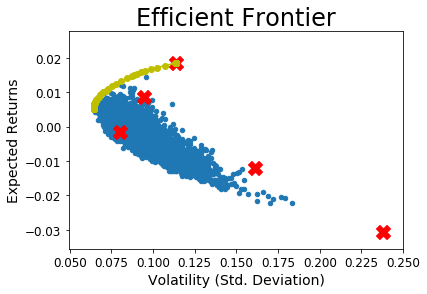

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from rf import return_portfolios, optimal_portfolio
import numpy as np

# 1. Load the stock data
stock_data = pd.read_csv('stock_data_weak.csv')
print(stock_data)
# 2. Find the quarterly return for each period
selected = list(stock_data.columns[1:])
returns_quarterly = stock_data[selected].pct_change()
# 3. Find the expected returns 
expected_returns = returns_quarterly.mean()

# 4. Find the covariance 
cov_quarterly =returns_quarterly.cov()

# 5. Find a set of random portfolios
random_portfolios = return_portfolios(expected_returns,cov_quarterly)
print(random_portfolios)
# 6. Plot the set of random portfolios
random_portfolios.plot.scatter(x='Volatility',y='Returns',fontsize=12)

# 7. Calculate the set of portfolios on the EF
weights, returns, risks = optimal_portfolio(returns_quarterly[1:])

# 8. Plot the set of portfolios on the EF
plt.plot(risks, returns, 'y-o')
plt.ylabel('Expected Returns',fontsize=14)
plt.xlabel('Volatility (Std. Deviation)',fontsize=14)
plt.title('Efficient Frontier', fontsize=24)
# Compare the set of portfolios on the EF to the 
try:
  single_asset_std=np.sqrt(np.diagonal(cov_quarterly))
  plt.scatter(single_asset_std,expected_returns,marker='X',color='red',s=200)
except:
  pass
plt.show()

     pcost       dcost       gap    pres   dres
 0: -1.0662e-02 -1.0359e+00  1e+00  0e+00  3e+00
 1: -1.1534e-02 -4.5915e-02  3e-02  1e-16  1e-01
 2: -3.2498e-02 -3.8737e-02  6e-03  2e-16  2e-03
 3: -3.4247e-02 -3.4697e-02  4e-04  1e-16  1e-04
 4: -3.4442e-02 -3.4469e-02  3e-05  1e-16  5e-07
 5: -3.4446e-02 -3.4446e-02  4e-07  1e-16  5e-09
 6: -3.4446e-02 -3.4446e-02  4e-09  1e-16  5e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.0582e-02 -1.0358e+00  1e+00  2e-16  3e+00
 1: -1.1451e-02 -4.5792e-02  3e-02  1e-16  1e-01
 2: -3.2227e-02 -3.8492e-02  6e-03  2e-16  2e-03
 3: -3.4012e-02 -3.4437e-02  4e-04  2e-16  8e-05
 4: -3.4193e-02 -3.4213e-02  2e-05  1e-16  7e-07
 5: -3.4196e-02 -3.4196e-02  2e-07  2e-16  7e-09
 6: -3.4196e-02 -3.4196e-02  2e-09  2e-16  7e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.0492e-02 -1.0357e+00  1e+00  0e+00  3e+00
 1: -1.1358e-02 -4.5653e-02  3e-02  9e-17  1e-01
 2: -3.1924e-02 -3.8217e

FileNotFoundError: [Errno 2] File weak_risks_returns.csv does not exist: 'weak_risks_returns.csv'

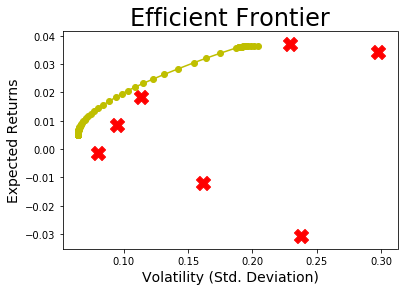

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from rf import return_portfolios, optimal_portfolio
import numpy as np

# 10. Change the path variable
path = 'stock_data2.csv'

# Load the stock data
stock_data = pd.read_csv(path)

# Find the quarterly for each period
selected=list(stock_data.columns[1:])
returns_quarterly = stock_data[selected].pct_change()

# Find the expected returns 
expected_returns = returns_quarterly.mean()

# Find the covariance 
cov_quarterly = returns_quarterly.cov()

# Find a set of random portfolios
random_portfolios = return_portfolios(expected_returns, cov_quarterly) 

# Plot the set of random portfolios
#random_portfolios.plot.scatter(x='Volatility', y='Returns', fontsize=12)

# Calculate the set of portfolios on the EF
weights, returns, risks = optimal_portfolio(returns_quarterly[1:])

# Plot the set of portfolios on the EF
plt.plot(risks, returns, 'y-o')
plt.ylabel('Expected Returns',fontsize=14)
plt.xlabel('Volatility (Std. Deviation)',fontsize=14)
plt.title('Efficient Frontier', fontsize=24)


# Compare the set of portfolios on the EF to the 
single_asset_std=np.sqrt(np.diagonal(cov_quarterly))
plt.scatter(single_asset_std,expected_returns,marker='X',color='red',s=200)


# 11 & 12. Compare to original
weak_EF = pd.read_csv('weak_risks_returns.csv')
plt.plot(weak_EF['Risks'], weak_EF['Returns'], 'g-o')

strong_EF = pd.read_csv('strong_risks_returns.csv')
plt.plot(strong_EF['Risks'], strong_EF['Returns'], 'k-x')

plt.show()

PFE    0.015530
TGT    0.014783
M      0.021962
VZ     0.004856
JPM    0.034781
MRO   -0.008010
KO    -0.002050
PG     0.004132
CVS    0.016124
HPQ   -0.000237
dtype: float64
          PFE       TGT         M        VZ       JPM       MRO        KO  \
PFE  0.010005  0.001738  0.005978  0.004071  0.007016  0.009721  0.002086   
TGT  0.001738  0.012874  0.015762  0.002188  0.007805  0.002239  0.002534   
M    0.005978  0.015762  0.038909  0.002804  0.016439  0.015110  0.005189   
VZ   0.004071  0.002188  0.002804  0.006958 -0.000407  0.005276  0.002586   
JPM  0.007016  0.007805  0.016439 -0.000407  0.023837  0.013848  0.002979   
MRO  0.009721  0.002239  0.015110  0.005276  0.013848  0.043166 -0.001516   
KO   0.002086  0.002534  0.005189  0.002586  0.002979 -0.001516  0.011021   
PG   0.004297  0.003148  0.005853  0.002094  0.006364  0.002834  0.001255   
CVS  0.004300  0.005384  0.012501  0.002052  0.005041  0.003689  0.003223   
HPQ  0.006996  0.007774  0.018937  0.003076  0.011523  

FileNotFoundError: [Errno 2] File all_ten.csv does not exist: 'all_ten.csv'

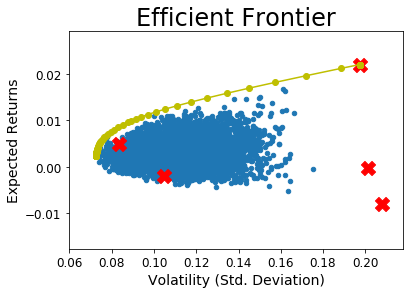

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from rf import return_portfolios, optimal_portfolio
import numpy as np

path='stock_data3.csv'

# 1. Load the stock data
stock_data = pd.read_csv(path)
selected = list(stock_data.columns[1:])
print(stock_data[selected].pct_change().mean())
print(stock_data[selected].pct_change().cov())

#stock_names = ['PFE', 'TGT', 'M', 'VZ', 'JPM', 'MRO', 'KO', 'PG', 'CVS', 'HPQ']
selected = ['KO', 'HPQ', 'M', 'VZ', 'MRO']

# 2. Find the quarterly for each period
returns_quarterly = stock_data[selected].pct_change()

# 3. Find the expected returns 
expected_returns = returns_quarterly.mean()

# 4. Find the covariance 
cov_quarterly = returns_quarterly.cov()

# 5. Find a set of random portfolios
random_portfolios = return_portfolios(expected_returns, cov_quarterly) 

# 6. Plot the set of random portfolios
random_portfolios.plot.scatter(x='Volatility', y='Returns', fontsize=12)

# 7. Calculate the set of portfolios on the EF
weights, returns, risks = optimal_portfolio(returns_quarterly[1:])

# 8. Plot the set of portfolios on the EF
plt.plot(risks, returns, 'y-o')
plt.ylabel('Expected Returns',fontsize=14)
plt.xlabel('Volatility (Std. Deviation)',fontsize=14)
plt.title('Efficient Frontier', fontsize=24)

#REMOVE THIS:
#pd.DataFrame({'Risks': risks, 'Returns': returns}).to_csv('all_ten.csv', index=False)

# 9. Compare the set of portfolios on the EF to the 
single_asset_std=np.sqrt(np.diagonal(cov_quarterly))
plt.scatter(single_asset_std,expected_returns,marker='X',color='red',s=200)

# All 10
all_ten_EF = pd.read_csv('all_ten.csv')
plt.plot(all_ten_EF['Risks'], all_ten_EF['Returns'], 'g-o')
plt.show()